In [199]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [200]:
#importing the dataset from github
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [201]:
#reading the first 5 data from the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [202]:
#reading the last 5 data from the dataset
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [203]:
data.shape

(1599, 12)

So,the dataset contains total 1599 rows and 12 coloumns.

In [204]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From this we get to know that there are no null values in the dataset.



In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. The feature values are float and label is integer value.
2. 11 features/independent values and 1 target/dependent value.

# DATA PREPROCESSING/ANALYSIS (EDA)

In [206]:
#statistical values check
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


        1.There are no null values 
        2.The difference between 75% quantile and max is huge for 'total sulfur dioxide','free sulfur dioxide'.
        3.This shows that there can be some outliers present in our dataset.

In [207]:
df_features=data.drop('quality',axis=1)


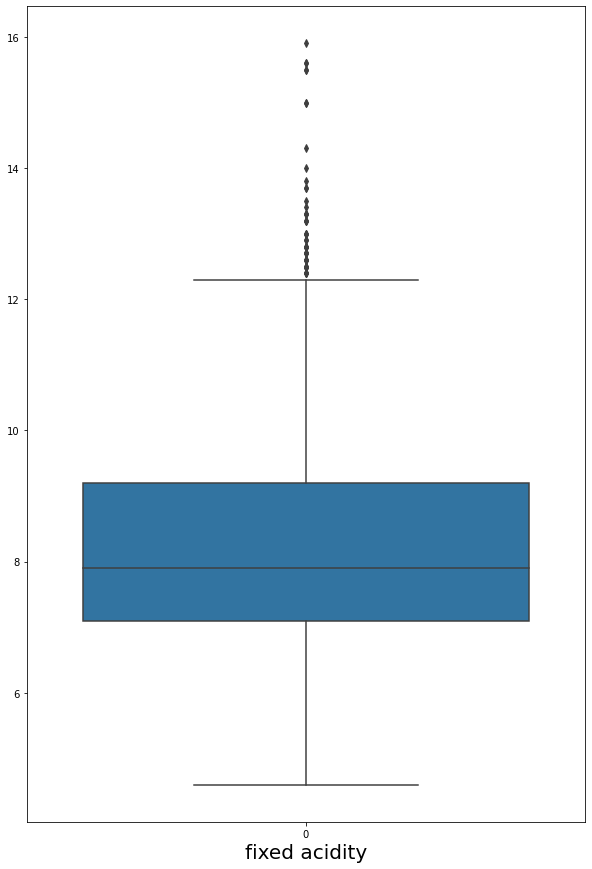

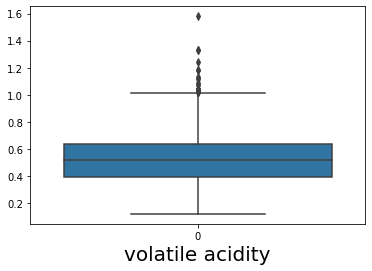

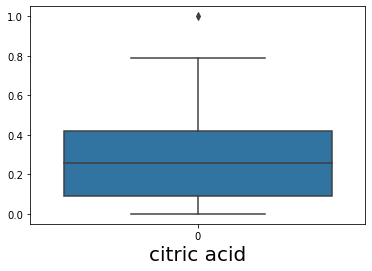

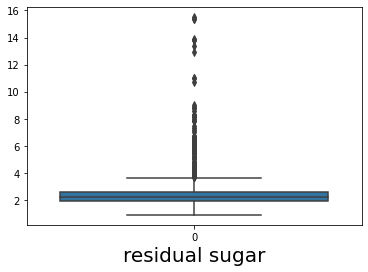

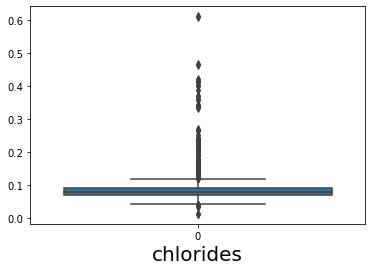

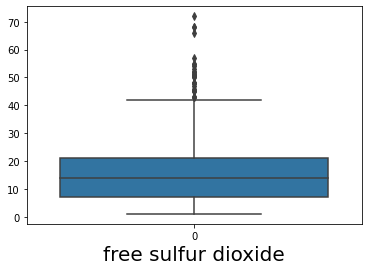

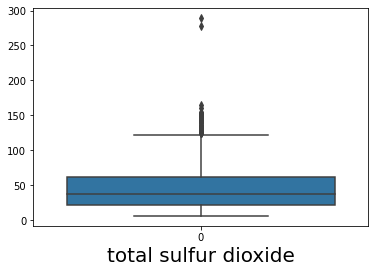

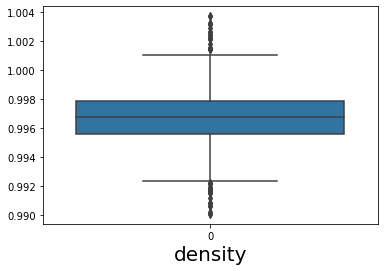

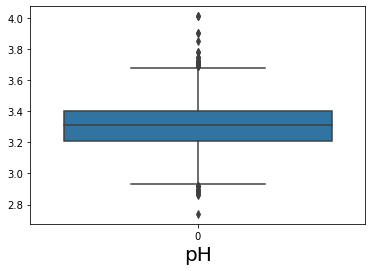

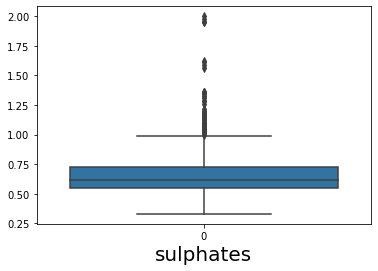

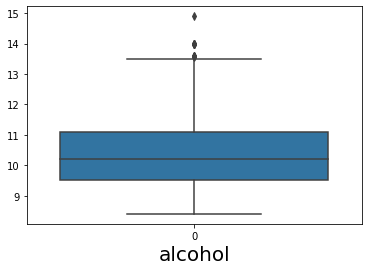

In [208]:
plt.figure(figsize=(10,15))
graph=1
for column in df_features:
    if graph<=12:
        #plt.subplot(2,6,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
     
    graph+=1
    plt.show()

we can say from this boxplot that every features contain outliers 

In [209]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

So the value reduces from 1599 to 1359.We can say there were duplicates and now we successfully removed them.

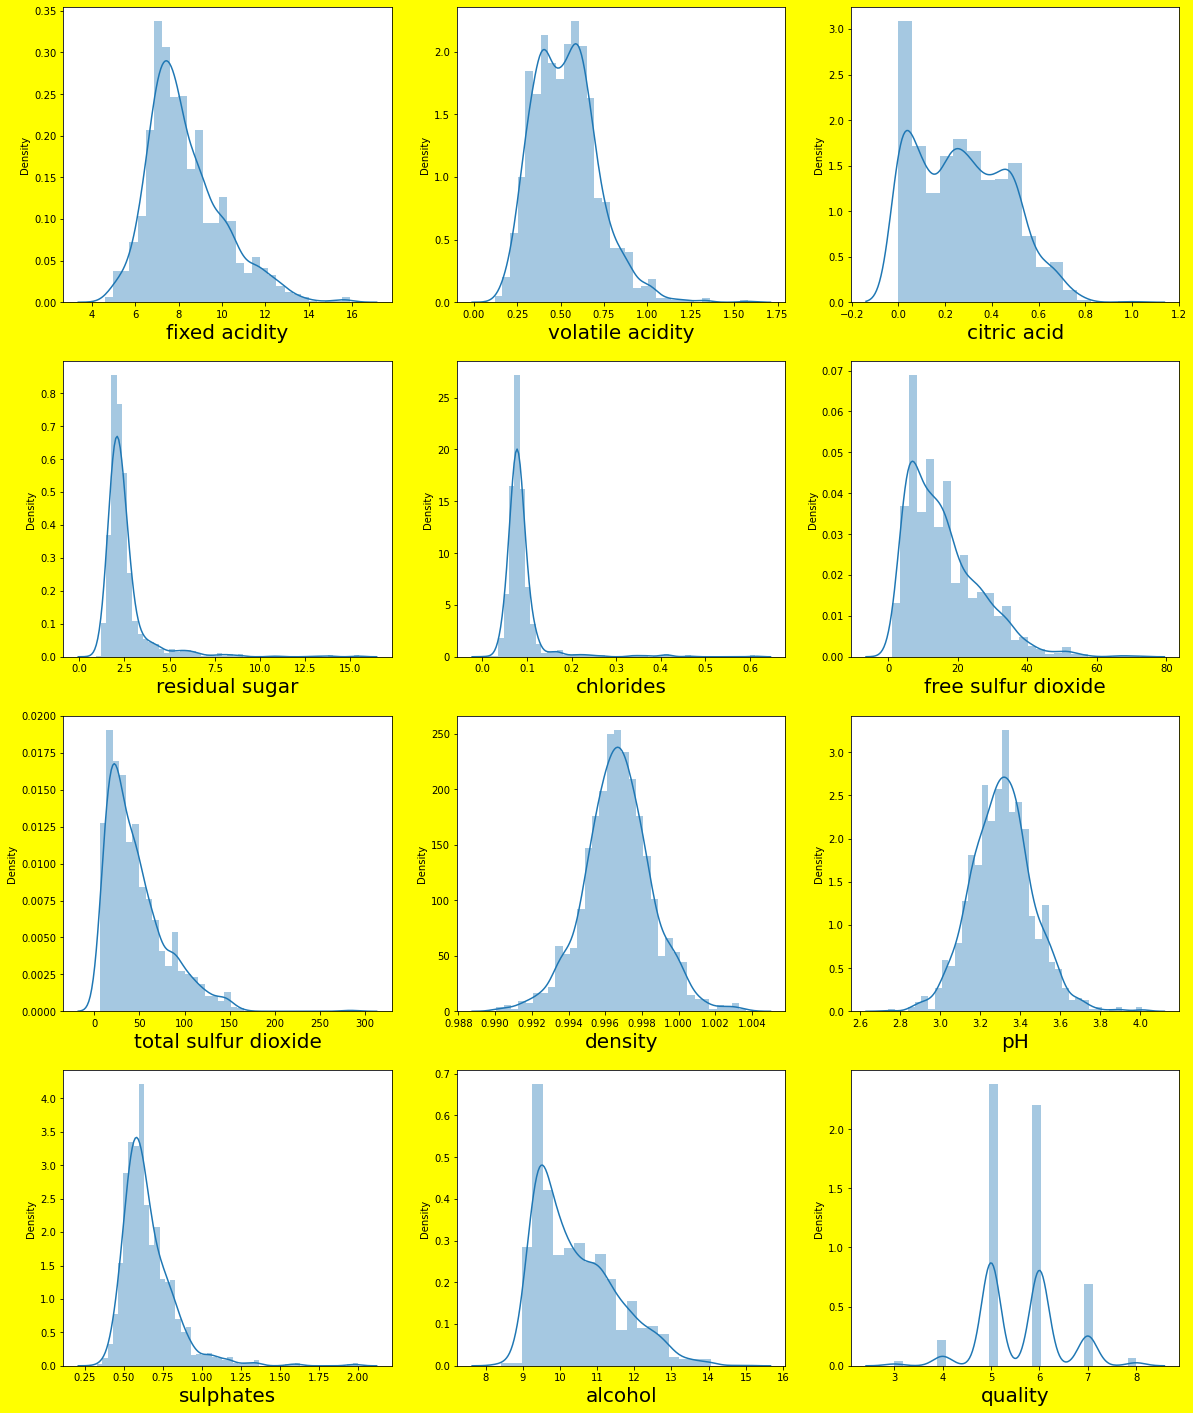

In [210]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    #if plotnumber<= 12
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see that after removing the duplicates ,the outliers are still there.

# Z-Score method for treating Outliers

In [211]:
from scipy.stats import zscore

In [212]:
z_score=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,8.306295,0.525432,0.266142,2.378692,0.081825,15.167877,44.262308,0.996683,3.313632,0.641994,10.421886,5.631961
std,1.650493,0.173001,0.191153,0.827975,0.022701,9.344298,30.019403,0.001717,0.140892,0.129866,1.038469,0.814932
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996690,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,6.550000,0.236000,47.000000,147.000000,1.002200,3.750000,1.170000,13.600000,8.000000


We need to remove the outliers in the best possible way,so here we applied zscore.Behind the scene this method uses z=(x-mean)/standard deviation .if standard deviation(std)=1,it covers 68% data,std=2 it covers 95% data and if std=3 it covers 99.7% data. We used here std=3 as it covers max data and 0.3% is outliers.

In [213]:
data.shape

(1239, 12)

Here we can see the difference in our shape of the dataset .It is reduced from 1359 to 1232. There were some outliers .

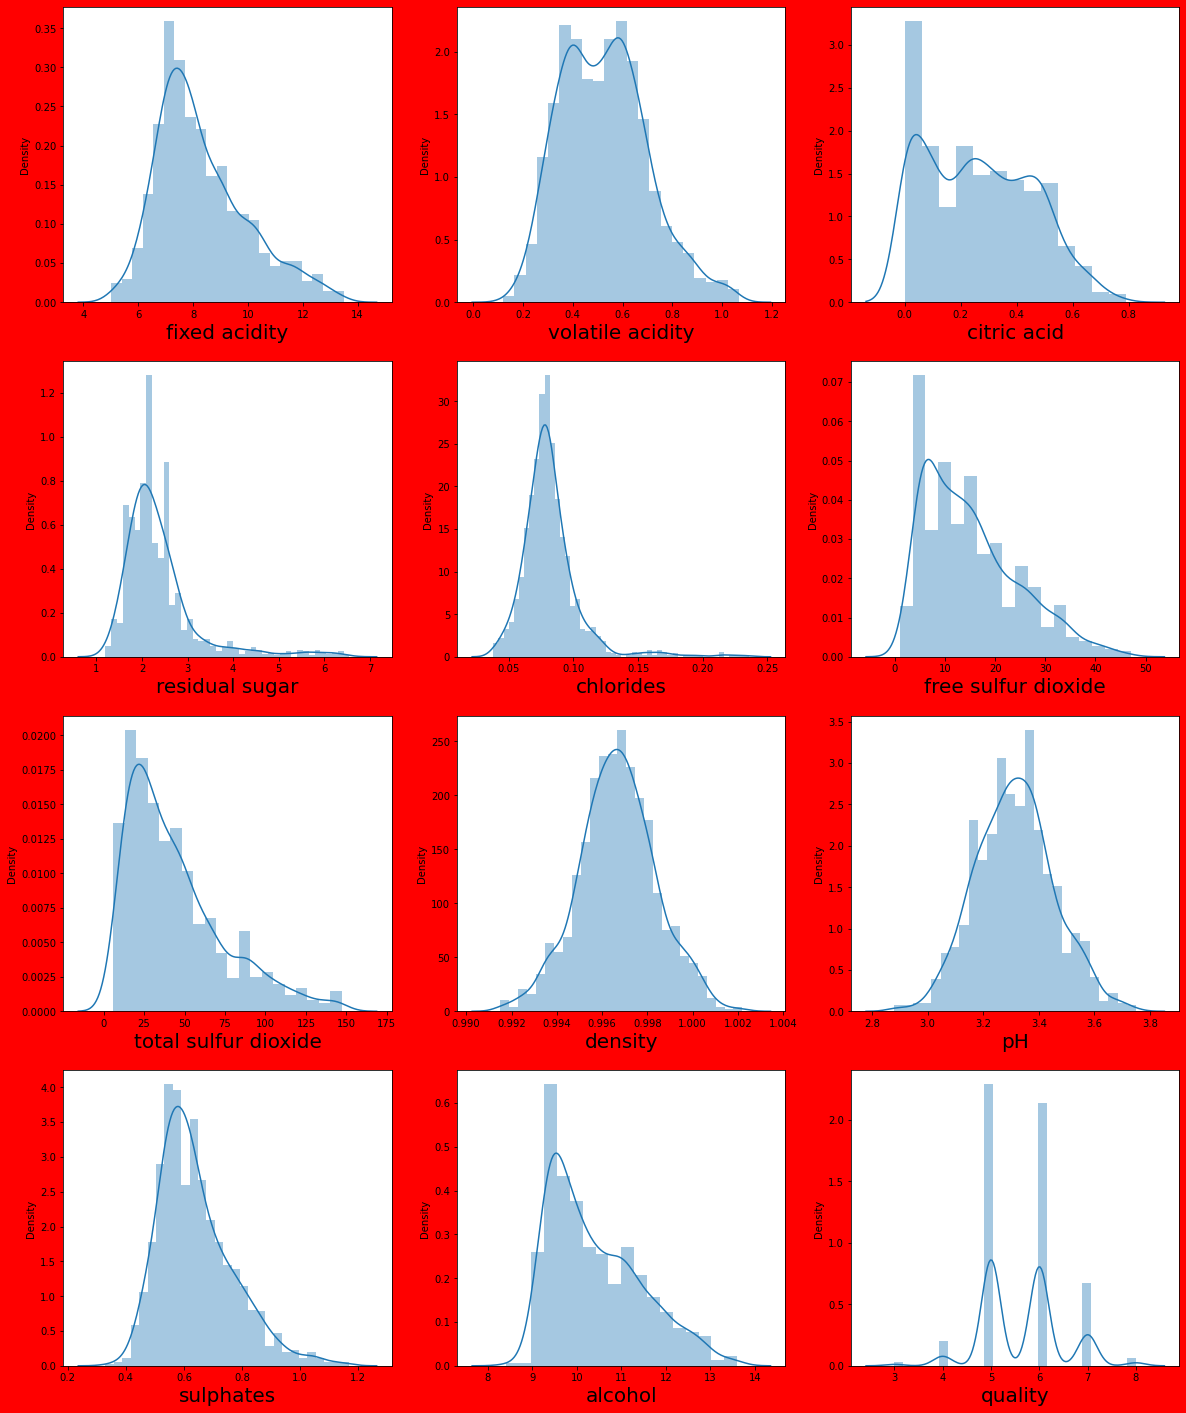

In [214]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in data:
    #if plotnumber<= 12
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

 If we compare this graph with the before ,it is clearly visible that the skewness is removed.

# FEATURE VS FEATURE CO-RELATION 

In [215]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295214,0.694900,0.178596,0.161180,-0.129192,-0.090289,0.659316,-0.708471,0.206067,-0.021713,0.131621
volatile acidity,-0.295214,1.000000,-0.586277,0.042038,0.079047,-0.000112,0.107727,0.009798,0.263937,-0.341434,-0.216562,-0.369907
citric acid,0.694900,-0.586277,1.000000,0.167597,0.099672,-0.058634,0.015058,0.359234,-0.527456,0.314609,0.161903,0.239204
residual sugar,0.178596,0.042038,0.167597,1.000000,0.098867,-0.010233,0.070850,0.329232,-0.076026,0.044924,0.161289,0.043436
chlorides,0.161180,0.079047,0.099672,0.098867,1.000000,-0.049311,0.059787,0.303134,-0.181430,0.044450,-0.211516,-0.131943
free sulfur dioxide,-0.129192,-0.000112,-0.058634,-0.010233,-0.049311,1.000000,0.654391,-0.027018,0.083310,0.051044,-0.090889,-0.067511
total sulfur dioxide,-0.090289,0.107727,0.015058,0.070850,0.059787,0.654391,1.000000,0.122758,-0.031596,-0.042984,-0.278700,-0.222127
density,0.659316,0.009798,0.359234,0.329232,0.303134,-0.027018,0.122758,1.000000,-0.321350,0.119810,-0.484351,-0.190830
pH,-0.708471,0.263937,-0.527456,-0.076026,-0.181430,0.083310,-0.031596,-0.321350,1.000000,-0.054193,0.140959,-0.082619
sulphates,0.206067,-0.341434,0.314609,0.044924,0.044450,0.051044,-0.042984,0.119810,-0.054193,1.000000,0.248136,0.378255


# Plotting Heatmap

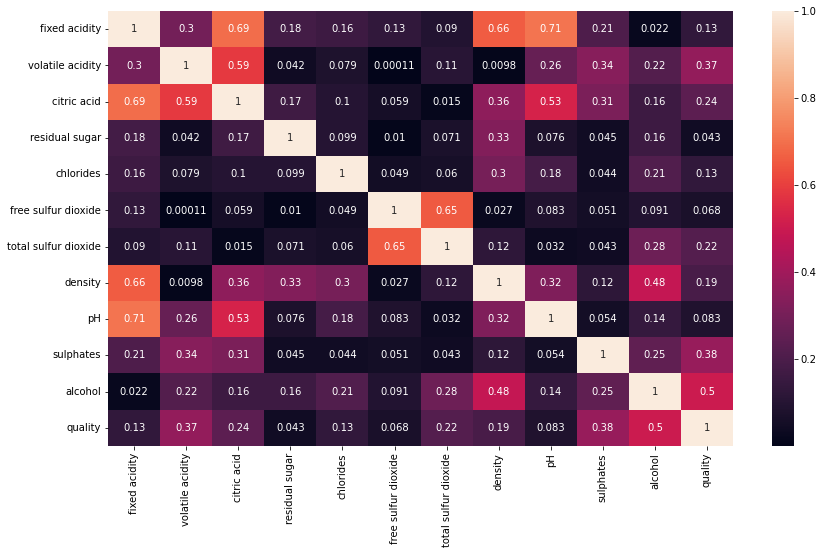

In [216]:
df_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

1. abs= the code will get the coefficient of one variable vs all other variable.
2. annot=True ,for this the numbers in the heatplot are visible.If it wa set False ,then only the colour will be visible.
3. pH has 71% corelation with fixed acidity.
4.citric acid has 69% correlation with fixed acidity.
5.total sulfur dioxide has 65% correlation with free sulfur dioxide.

# Visualizing the graphical representation of two co-related features

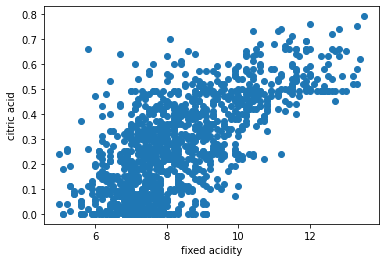

In [217]:
plt.scatter(x=data['fixed acidity'],y=data['citric acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.show()

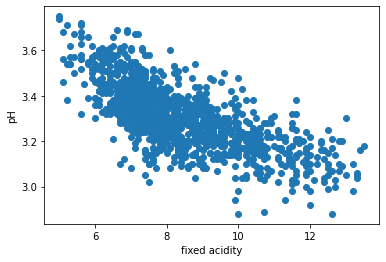

In [218]:
plt.scatter(x=data['fixed acidity'],y=data['pH'])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()

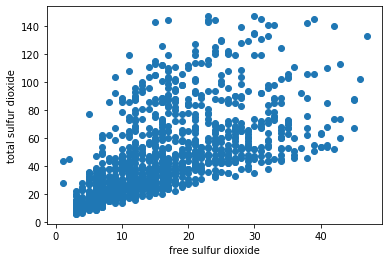

In [219]:
plt.scatter(x=data['free sulfur dioxide'],y=data['total sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.show()

from the upper three graph we can see that the features are interconnecting,that is why whenever any one feature is increasing other is increasing too.We can say that they are correlated.

But the problem is that which one feature should we drop,then we will see the features contribution to target variable.

1. citric acid vs quality-0.24
2. fixed acidity vs quality-0.13
here we can drop fixed acidity as it is less contributing.

3. pH vs quality-0.083
4. fixed acidity vs quality-0.13
here we can drop pH,as its less contributing.

5. total sulfur dioxide vs quality- 0.22
6. free sulfur dioxide vs quality-0.068
here we can drop free sulfur dioxide as it is less contributing.

Still we can not surely say that we can drop these feature ,so we will plot another graph to confirm this.

# FEATURE VS TARGET CORELATION

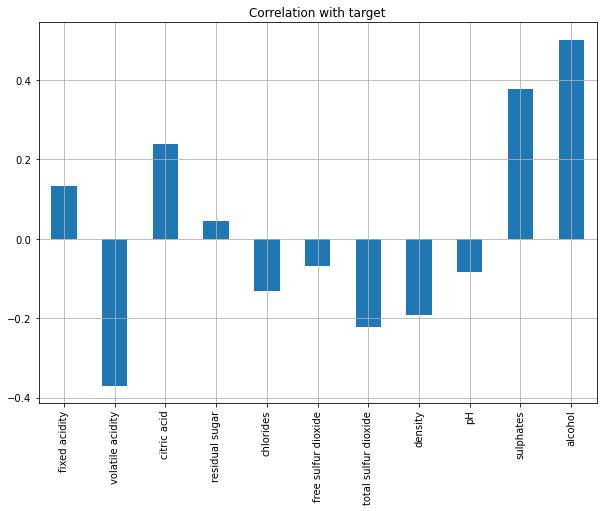

In [220]:
data.drop('quality',axis=1).corrwith(data.quality).plot(kind='bar',grid=True,figsize=(10,7),title="Correlation with target")
plt.show()

We can clearly see that residual sugar,free sulfur dioxide have very less (almost zero) co-relation with the Quality(target).They are less contributing features,so we can drop them.

In [221]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [222]:
data.drop('residual sugar',axis=1,inplace=True)
data

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [223]:
data.drop('free sulfur dioxide',axis=1,inplace=True)
data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,0.075,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [224]:
data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,0.075,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5


Now,our dataset contains 1239 rows and 10 column.

# Checking the unique numbers in target variable

In [225]:
data.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

1. The quality rating scale is between 0 to 10.But here we can see that it is from 3 to 8 scale,because the unique values in quality are 3,4,5,6,7,8.
2. The quality value is discrete or categorical in nature,as we can see from this above code.

# Binarizing the unique values

In [226]:
data['quality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
data['quality'].unique()

array([0, 1], dtype=int64)

In [227]:
 #See proportion of good vs bad wines
data['quality'].value_counts()

0    1070
1     169
Name: quality, dtype: int64

0- bad qulity
1-good quality

So it is an imbalanced dataset,if we train this dataset then the result will be biased .Because number of bad quality wine is greater than good quality wine.So the training data will be more of bad quality data,that leads to wrong prediction.

# Visualizing the quantity of good and bad wine

<AxesSubplot:xlabel='quality', ylabel='count'>

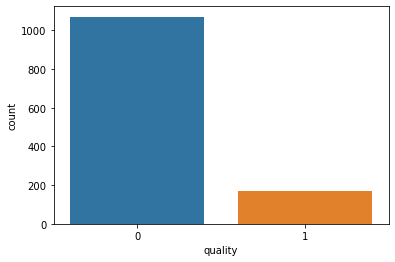

In [228]:
import seaborn as sns
sns.countplot(data['quality'])

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)

In [229]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

0    1070
1    1070
Name: quality, dtype: int64

1. In this process the minor class will be increased and  equal/almost equal to major class.Interestingly,this process will not duplicate any data.It uses euclidian distance under the hood and find the closest data points to the minority class and create new minority data points.
2. As our dataset is not much large so we chose this upsampling technique.


In [230]:
X=data.drop('quality',axis=1)
y=data['quality']

In [231]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,0.075,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [232]:
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1239, dtype: int64

# Splitting train and test data

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)


# Feature Scaling

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [236]:
X_train

array([[-0.37414942,  1.18122902, -1.66023108, ...,  0.97265525,
        -0.82561268, -1.26197394],
       [ 0.22401317,  0.05945657, -0.37817681, ..., -1.48110019,
        -1.21267747, -1.53646865],
       [-0.37414942, -0.22131035,  0.11636461, ...,  0.35675073,
         1.07890693,  1.47247265],
       ...,
       [ 0.88199203,  1.36819109, -1.07262288, ..., -3.11693714,
        -1.6771552 , -1.07897747],
       [ 0.24543364, -0.63859723,  0.03681231, ..., -0.07775155,
         0.64693221,  0.56319905],
       [-1.1517608 ,  0.18409796, -1.66023108, ...,  1.04701147,
        -1.05785155,  1.29997665]])

If we dont standardize the data,then model will give priority to those  who have higher values.So it will be biased. After standardization all data looks almost same.So machine will not face any confusion.


# PCA(PRINCIPAL COMPONENT ANALYSIS)

In [237]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [238]:
sum(pca.explained_variance_ratio_)

0.9305296752388027

In [239]:
pca.explained_variance_ratio_

array([0.34833996, 0.24894011, 0.11023894, 0.09327852, 0.07317821,
       0.05655394])

1. It is a dimension reduction technique i.e by applying PCA,it reduces the number of variables in dataset while preserving as much data as  possible.
2. We can say that 6 components are having 93% information of our large dataset.

# Model Training

# LOGISTIC REGRESSION

In [240]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [241]:
y_pred1=lr.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8014018691588785

In [243]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [244]:
precision_score(y_test,y_pred1)

0.7816593886462883

In [245]:
recall_score(y_test,y_pred1)

0.8364485981308412

In [246]:
f1_score(y_test,y_pred1)

0.8081264108352145

In [247]:
confusion_mat = confusion_matrix(y_test,y_pred1)
print(confusion_mat)

[[164  50]
 [ 35 179]]


TRUE POSITIVE=164
FALSE POSITIVE=50
FALSE NEGATIVE=35
TRUE NEGATIVE=179

# knn Model

In [248]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.8738317757009346


In [249]:
precision_score(y_test,y_pred2)


0.8225806451612904

In [250]:
f1_score(y_test,y_pred2)

0.8831168831168831

In [251]:
recall_score(y_test,y_pred2)

0.9532710280373832

# SVC MODEL

In [252]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train,y_train)
pred_y3 = SVC.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y3))

Accuracy Score: 0.8644859813084113


In [253]:
precision_score(y_test,pred_y3)

0.8421052631578947

In [254]:
f1_score(y_test,pred_y3)

0.8687782805429863

In [255]:
recall_score(y_test,pred_y3)

0.897196261682243

# DecisionTree Classifier

In [296]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,y_train)
y_pred4 = DT.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.8200934579439252


In [297]:
precision_score(y_test,y_pred4)

0.7991266375545851

In [298]:
recall_score(y_test,y_pred4)

0.8551401869158879

In [299]:
f1_score(y_test,y_pred4)

0.8261851015801355

# Random Forest Classifier

In [300]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)
RF.fit(X_train, y_train)
y_pred5 = RF.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 0.9088785046728972


In [301]:
precision_score(y_test,y_pred5)

0.8854625550660793

In [302]:
f1_score(y_test,y_pred5)

0.9115646258503403

In [303]:
recall_score(y_test,y_pred5)

0.9392523364485982

# XGBOOST

In [304]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=1)
xg.fit(X_train, y_train)
y_pred6 = xg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred6))

Accuracy Score: 0.883177570093458


In [305]:
recall_score(y_test,y_pred6)

0.9158878504672897

In [306]:
f1_score(y_test,y_pred6)

0.8868778280542987

In [307]:
precision_score(y_test,y_pred6)

0.8596491228070176

# Bagging Classifier

In [268]:
from sklearn.ensemble import  BaggingClassifier

In [269]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,random_state=3,oob_score=True)
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.8691588785046729

In [271]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=False,random_state=3,oob_score=False)
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.8714953271028038

This ensemble technique predicted the accuracy correctly because 9 models'prediction can not be false.We applied this method just to ensure that no data leakage is happening.

# Accuracy Score of models

In [308]:
import pandas as pd
pd.DataFrame({'Model':['lr','knn','SVC','dt','RF','xg'],'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                                                                         accuracy_score(y_test,y_pred2)*100,
                                                                         accuracy_score(y_test,pred_y3)*100,
                                                                         accuracy_score(y_test,y_pred4)*100,
                                                                         accuracy_score(y_test,y_pred5)*100,
                                                                         accuracy_score(y_test,y_pred6)*100]})

,Model,Accuracy
0,lr,80.140187
1,knn,87.383178
2,SVC,86.448598
3,dt,82.009346
4,RF,90.887850
5,xg,88.317757


we can use random forest classifier model for future prediction,(we did not conduct hyperparameter tuning as the accuracy is good).Let's see another evidence for choosing random forest classifier.

# AUC_ROC CURVE

In [280]:

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

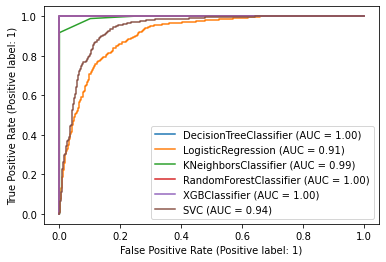

In [291]:
disp=plot_roc_curve(dt,X_train,y_train)
plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)
plot_roc_curve(RF,X_train,y_train,ax=disp.ax_)
plot_roc_curve(xg,X_train,y_train,ax=disp.ax_)
plot_roc_curve(SVC,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

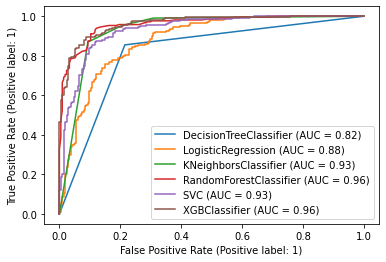

In [292]:
disp=plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(RF,X_test,y_test,ax=disp.ax_)
plot_roc_curve(SVC,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xg,X_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')
plt.show()

1. from the auc_roc curve we can see that random forest model's and xgb model's AUC For training data= 100 and test data=96%.
2. from the accuracy score we get to know that the accuracy of xgb=88.31% ,but the accuracy score for random forest=90%

Hence,we will choose random forest as our model for prediction


# Save the best model

In [309]:
X=data.drop('quality',axis=1)
y=data['quality']

In [310]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)

In [311]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X_res)


In [312]:
X=pca.fit_transform(X)

In [313]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X,y_res)

RandomForestClassifier()

In [314]:
import joblib
joblib.dump(RF,'WINE QUALITY PREDICTION')

['WINE QUALITY PREDICTION']